# Logistic Regression With Bank Data

In [18]:
!pip install gdown

In [19]:
!gdown --id 18KwSR9aVTZRNaOVF76VE9USSEkqnYzzQ

/opt/conda/lib/python3.10/site-packages/gdown/cli.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=18KwSR9aVTZRNaOVF76VE9USSEkqnYzzQ
To: /kaggle/working/bank-data.zip
100%|████████████████████████████████████████| 516k/516k [00:00<00:00, 94.1MB/s]


In [20]:
%%capture
!unzip -o bank-data.zip

In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

## Load the dataset

In [22]:
url = "/kaggle/working/bank-data/bank-full.csv"
df = pd.read_csv(url, sep=";")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


## Explore the Data

In [23]:
print(df['y'].value_counts())
df.info()

y
no     39922
yes     5289
Name: count, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [24]:
df.describe().astype(np.int64)

,age,balance,day,duration,campaign,pdays,previous
count,45211,45211,45211,45211,45211,45211,45211
mean,40,1362,15,258,2,40,0
std,10,3044,8,257,3,100,2
min,18,-8019,1,0,1,-1,0
25%,33,72,8,103,1,-1,0
50%,39,448,16,180,2,-1,0
75%,48,1428,21,319,3,-1,0
max,95,102127,31,4918,63,871,275


## Pair Plot for Feature Correlations

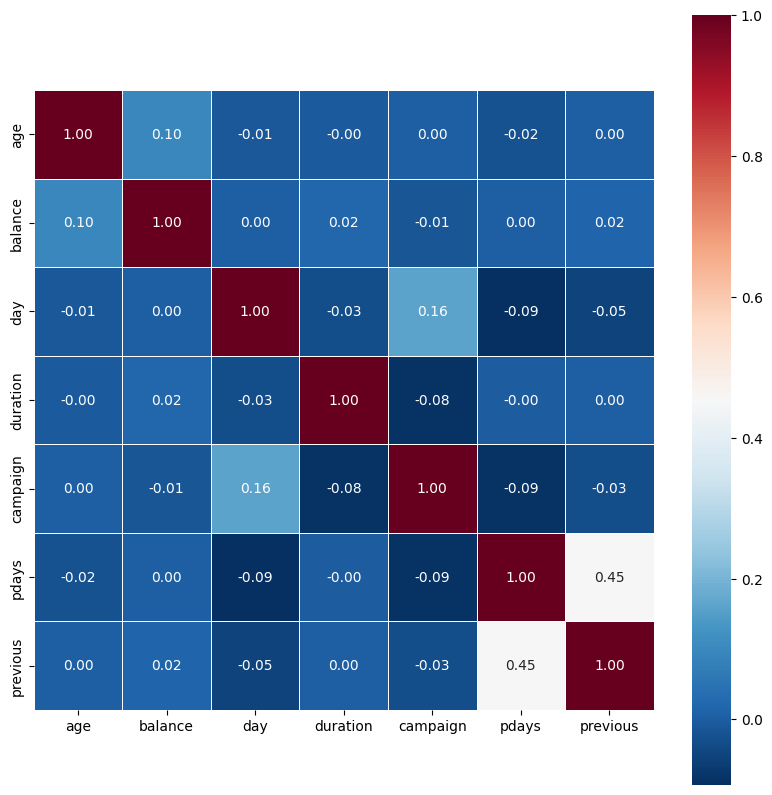

In [25]:
plt.subplots(figsize=(10, 10))

sns.heatmap(df._get_numeric_data().astype(float).corr(),
            square=True,
            cmap='RdBu_r',
            linewidths=.5,
            annot=True,
            fmt='.2f')
plt.show()

## Unique values for each categorical column and value count

In [26]:
category_features = df.select_dtypes(include=['object', 'bool']).columns.values

for col in category_features: 
    print(df[col].value_counts(), "\n")
    
print(df.nunique(axis=1))

job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: count, dtype: int64 

marital
married     27214
single      12790
divorced     5207
Name: count, dtype: int64 

education
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: count, dtype: int64 

default
no     44396
yes      815
Name: count, dtype: int64 

housing
yes    25130
no     20081
Name: count, dtype: int64 

loan
no     37967
yes     7244
Name: count, dtype: int64 

contact
cellular     29285
unknown      13020
telephone     2906
Name: count, dtype: int64 

month
may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: count, dtype: int64 

poutcome
unknown    36959
failure 

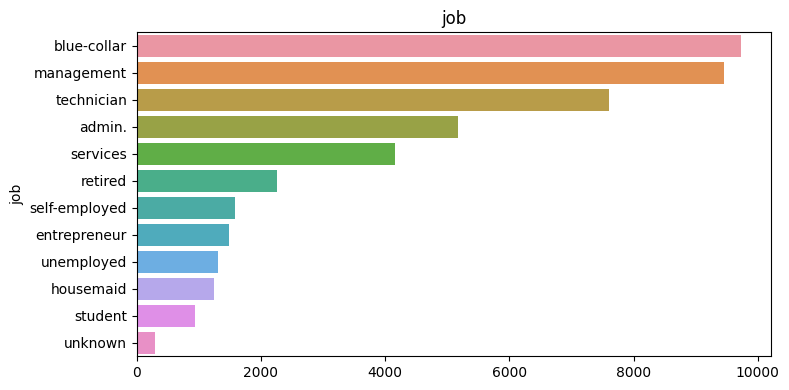

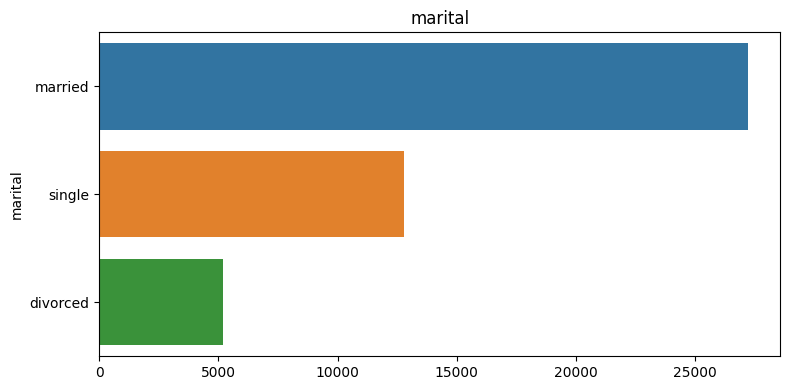

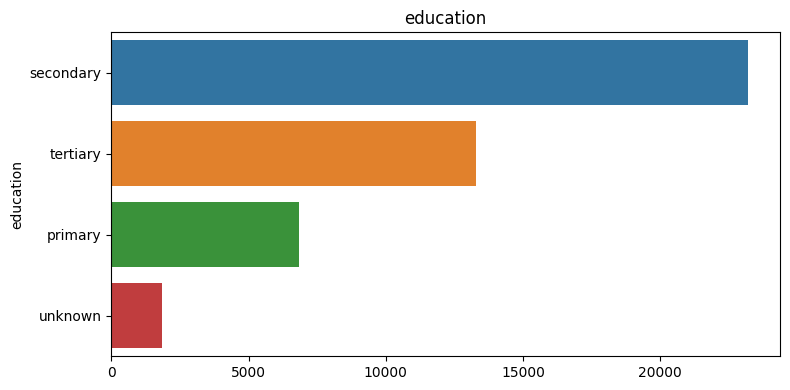

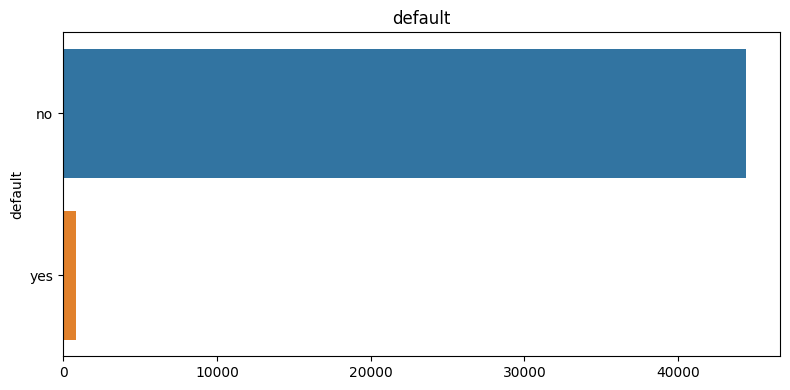

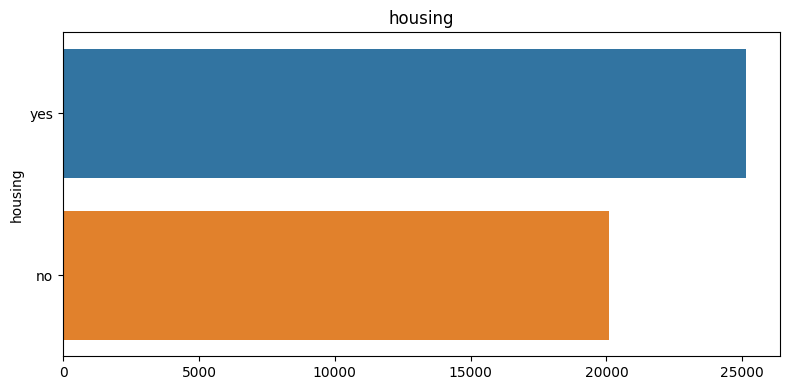

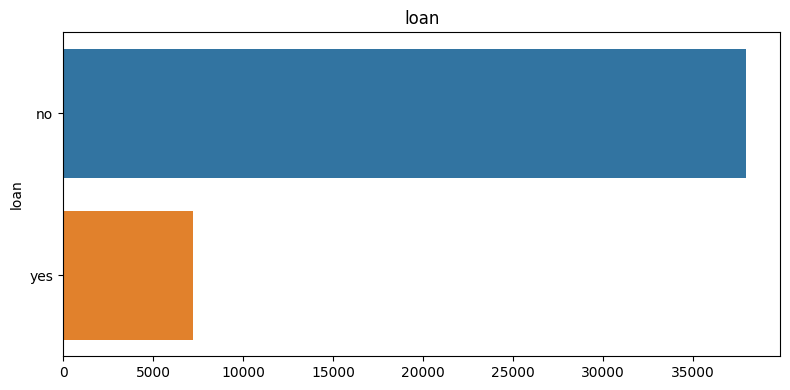

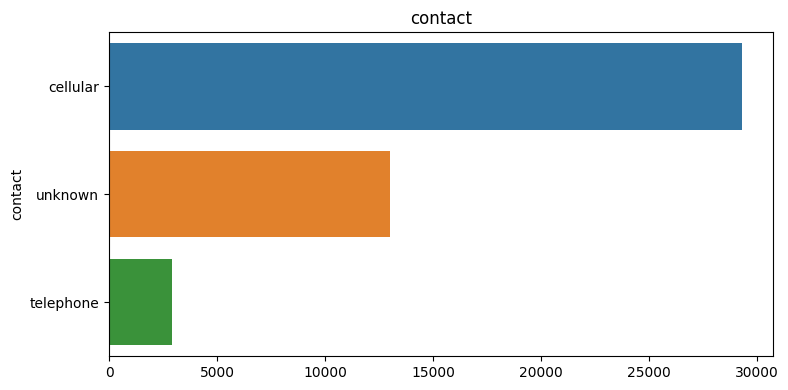

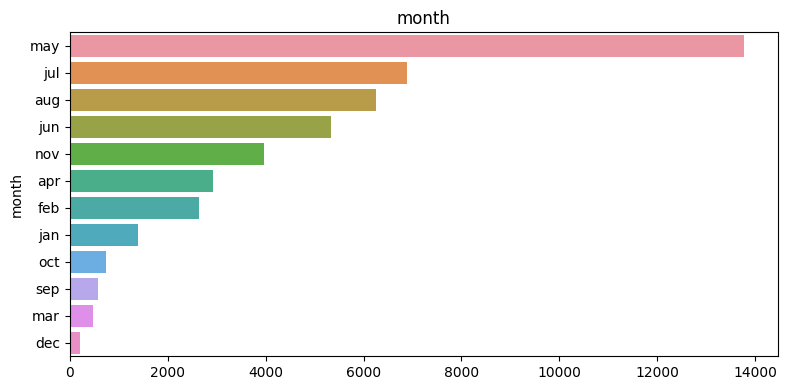

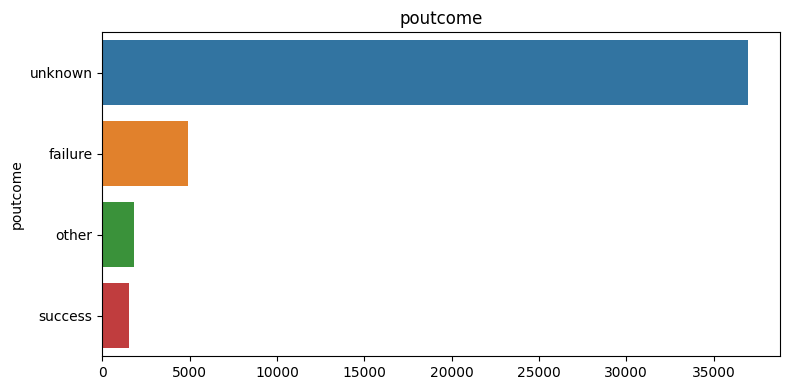

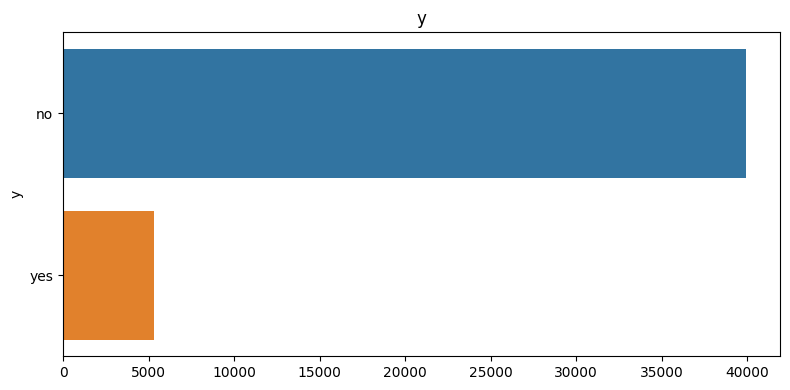

In [27]:
for col in category_features:
    plt.figure(figsize=(8, 4))
    sns.barplot(y=df[col].value_counts().index, x=df[col].value_counts().values)
    plt.title(col)
    plt.tight_layout()
    plt.show()

## Convert 'no' and 'yes' to 0 and 1 in the target variable

In [28]:
df['y'] = df['y'].map({'no': 0, 'yes': 1})

In [29]:
X = df.drop('y', axis=1)
y = df['y']

## Split the data into training and testing sets

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

print("X_train dataset: ", X_train.shape)
print("y_train dataset: ", y_train.shape)
print("X_test dataset: ", X_test.shape)
print("y_test dataset: ", y_test.shape)

X_train dataset:  (36168, 16)
y_train dataset:  (36168,)
X_test dataset:  (9043, 16)
y_test dataset:  (9043,)


## Classify features into numerical and categorical groups

In [31]:
numeric_features = X_train.select_dtypes(include=['float64', 'int64']).columns.values
numeric_features = numeric_features[numeric_features != 'y']

categorical_features = X_train.select_dtypes(include=['object', 'bool']).columns.values

## Build and train the Logistic Regression model with feature scaling

In [32]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', LogisticRegression(max_iter=1000))])

model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  array(['age', 'balance', 'day', 'duration', 'campaign', 'pdays',
       'previous'], dtype=object)),
                                                 ('cat', OneHotEncoder(),
                                                  array(['job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'poutcome'], dtype=object))])),
                ('classifier', LogisticRegression(max_iter=1000))])

## Test the model

In [33]:
y_pred = model.predict(X_test)

## Evaluate the model

In [34]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.90

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      8005
           1       0.65      0.35      0.46      1038

    accuracy                           0.90      9043
   macro avg       0.79      0.66      0.70      9043
weighted avg       0.89      0.90      0.89      9043



## Confusion Matrix

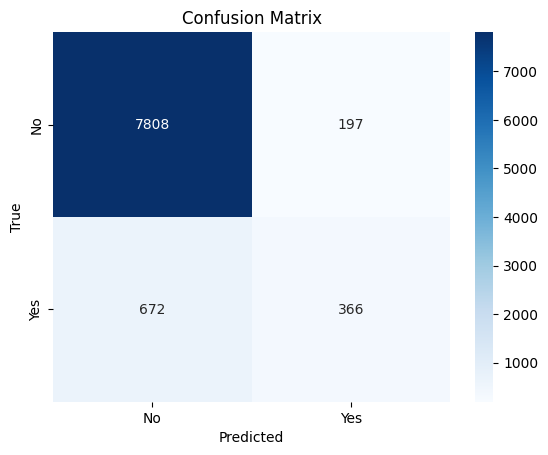

In [35]:
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(
    conf_matrix,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["No", "Yes"],
    yticklabels=["No", "Yes"],
)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

## ROC Curve

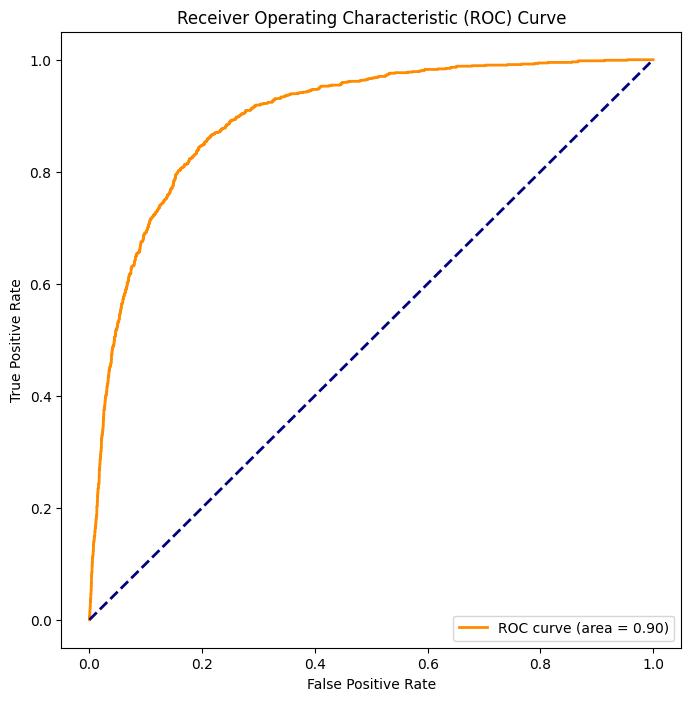

In [36]:
y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 8))
plt.plot(
    fpr,
    tpr,
    color="darkorange",
    lw=2,
    label="ROC curve (area = {:.2f})".format(roc_auc),
)
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()